In [2]:
from functools import lru_cache, partial
from importlib import reload

from modAL import batch
from art.attacks.evasion import FastGradientMethod

from librun import run, plot
from libadversarial import random_batch, density, comparative_density, comparative_density_margin, adversarial
from libdatasets import *

In [3]:
import libadversarial; reload(libadversarial)
import librun; reload(librun); 
from libadversarial import comparative_density_margin
from librun import plot

In [7]:
matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)
    "datasets": [
        ("car", lambda: lru_cache(car)()),
        ("haberman", lambda: lru_cache(haberman)()),
        ("banknote", lambda: lru_cache(banknote)()),
        ("cardio", lambda: lru_cache(libdatasets.cardio)())
    ],
    "dataset_mutators": {
        "none": (lambda *x: x),
    },
    "methods": [
        ("random", partial(random_batch, n_instances=10)),
        ("uncertainty", partial(batch.uncertainty_batch_sampling, n_instances=10)),
        ("density", partial(density, n_instances=10)),
        ("comparative density", partial(comparative_density, n_instances=10)),
        ("comparative density margin", partial(comparative_density_margin, n_instances=10)),
        #("fgm", partial(adversarial, Attack=FastGradientMethod, n_instances=10, minimal=True))
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 0.1,
        "n_runs": 1
    }
}

In [8]:
results = run(matrix)

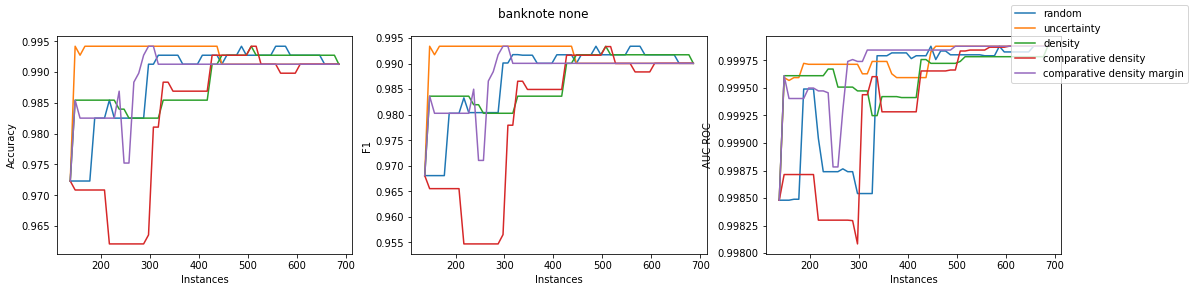

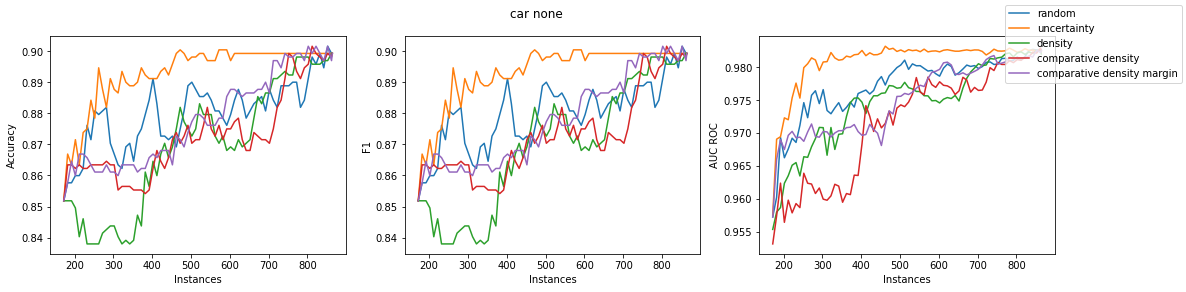

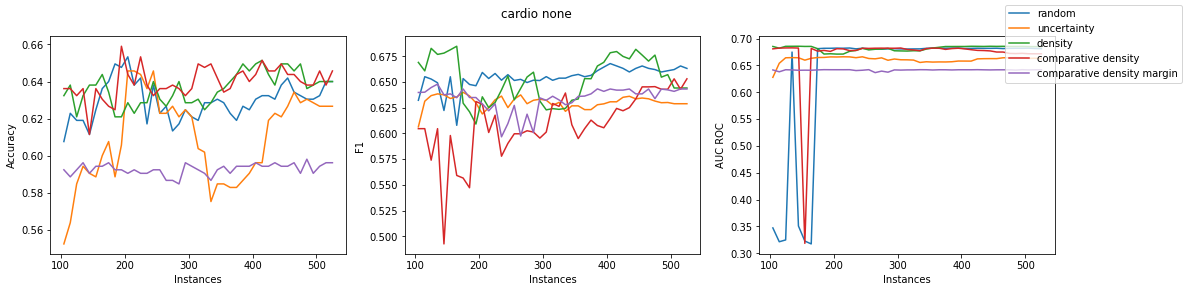

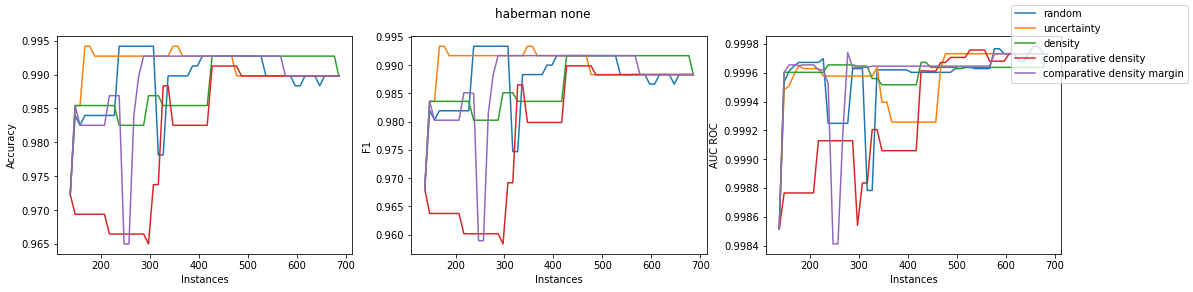

In [20]:
plot(results)